In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from datetime import datetime,date,timedelta
import seaborn as sns
import os, warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
cityTemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalLandTemperaturesByCity.csv')
ctrTemp = pd.read_csv('../data/GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv')

In [4]:
continents = ['North America','South America','Europe','Asia','Africa','Australia','Antarcita']

In [5]:
continentTemp = ctrTemp[ctrTemp['Country'].isin(continents)]
continentTemp = continentTemp.dropna()
# print(len(countryTemp))
# print(len(continentTemp))
countryTemp = ctrTemp[~ctrTemp['Country'].isin(continents)]
countryTemp = countryTemp.dropna()
# print(len(countryTemp))
# continentTemp.head()

In [6]:
#North vs South Hemisphere
cityTemp = cityTemp.dropna()
north = cityTemp[cityTemp['Latitude'].str.contains('N')]
south = cityTemp[cityTemp['Latitude'].str.contains('S')]
east = cityTemp[cityTemp['Longitude'].str.contains('E')]
west = cityTemp[cityTemp['Longitude'].str.contains('W')]

# north.head()

In [7]:
quadTemp = cityTemp
quadTemp['Year'] = quadTemp['dt'].apply(lambda x : x[:4])
quadTemp['NorthSouth'] = quadTemp['Latitude'].apply(lambda x : 'North' if x.find('N') > -1 else 'South')
quadTemp['EastWest'] = quadTemp['Longitude'].apply(lambda x : 'East' if x.find('E') > -1 else 'West')
quadTemp['Quadrant'] = quadTemp['NorthSouth']+quadTemp['EastWest']
# quadTemp.head()

In [8]:
quadTempAvgCity = quadTemp.groupby(['Quadrant','City']).mean().reset_index(drop=False)
quadTempAvgYear = quadTemp.groupby(['Quadrant','City','Year']).mean().reset_index(drop=False)

# print(len(quadTempAvgCity))
# print(len(quadTempAvgYear))

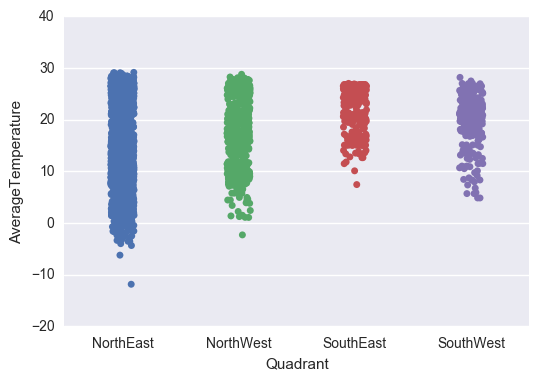

In [9]:
sns.stripplot(x="Quadrant", y="AverageTemperature", data=quadTempAvgCity, jitter=True)

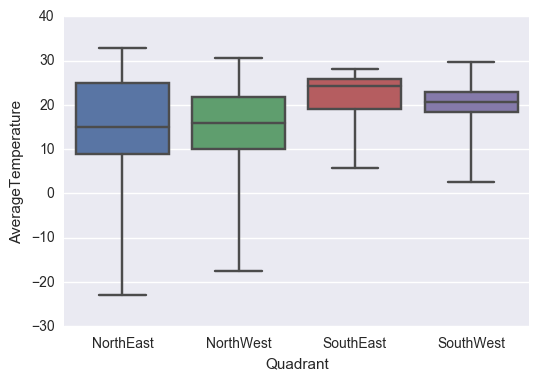

In [10]:
sns.boxplot(x="Quadrant", y="AverageTemperature", data=quadTempAvgYear, whis=np.inf)

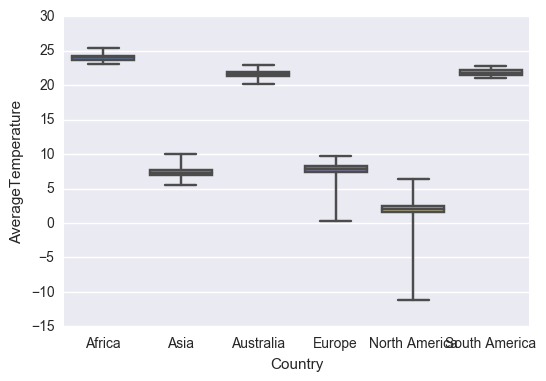

In [34]:
continentTemp['Year'] = continentTemp['dt'].apply(lambda x : x[:4])
continentTempAvg = continentTemp.groupby(['Country','Year']).mean().reset_index(drop=False)
# continentTempAvg.head()
#Average temperautre of 6/7 continents
sns.boxplot(x="Country", y="AverageTemperature", data=continentTempAvg, whis=np.inf)

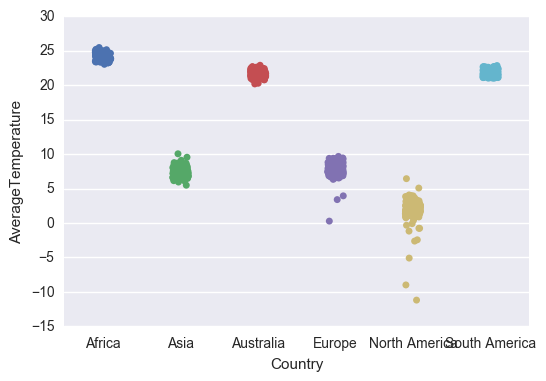

In [36]:
sns.stripplot(x="Country", y="AverageTemperature", data=continentTempAvg, jitter=True)

In [13]:
countryTemp['Year'] = countryTemp['dt'].apply(lambda x : x[:4])
# print(len(countryTemp))
countryTempAvg = countryTemp.groupby('Country').mean().reset_index(drop=False)
countryTempAvgYear = countryTemp.groupby(['Country','Year']).mean().reset_index(drop=False)
# print(len(countryTempAvg))
# print(len(countryTempAvgYear))
# countryTempAvg.head()

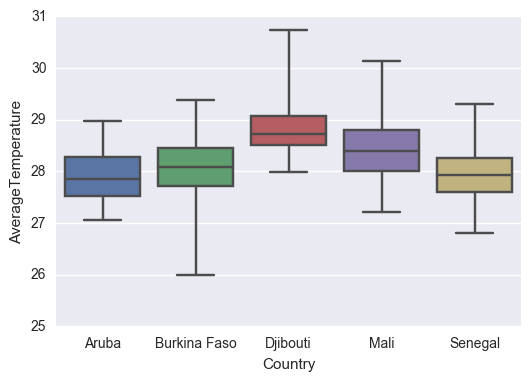

In [33]:
#five hottest countries in the world (on average)
hottestCountries = countryTempAvg.sort_values('AverageTemperature', ascending=False).head()
hotCountries = DataFrame()

for each in hottestCountries['Country']:
    holder = countryTemp[countryTemp['Country'] == each]
    holder['Year'] = holder['dt'].apply(lambda x : x[:4])
    hotCountries = hotCountries.append(holder)

hotCountriesAvg = hotCountries.groupby(['Country','Year']).mean().reset_index(drop=False)

sns.boxplot(x="Country", y="AverageTemperature", data=hotCountriesAvg, whis=np.inf)

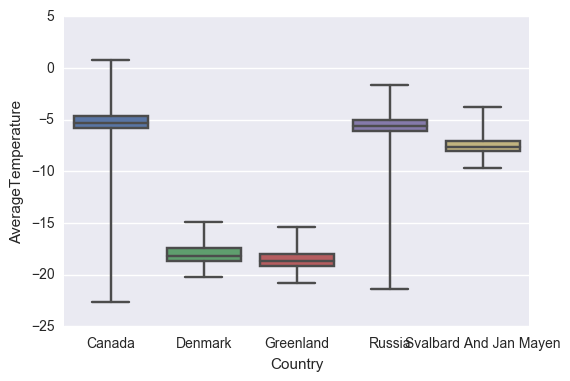

In [32]:
#five coldest countries in the world (on average)
coldestCountries = countryTempAvg.sort_values('AverageTemperature').head()
coldCountries = DataFrame()

for each in coldestCountries['Country']:
    holder = countryTemp[countryTemp['Country'] == each]
    holder['Year'] = holder['dt'].apply(lambda x : x[:4])
    coldCountries = coldCountries.append(holder)

coldCountriesAvg = coldCountries.groupby(['Country','Year']).mean().reset_index(drop=False)

sns.boxplot(x="Country", y="AverageTemperature", data=coldCountriesAvg, whis=np.inf)

In [31]:
cityTempAvg = cityTemp.groupby('City').mean().reset_index(drop=False).sort_values('AverageTemperature')
coldestCities = cityTempAvg.head()
hottestCities = cityTempAvg.tail()
# coldestCities.head()

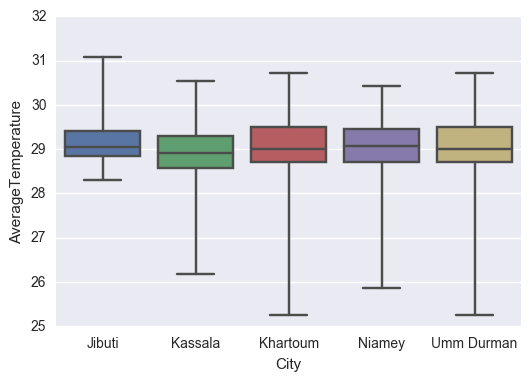

In [29]:
#Average temperature of the 5 hottest cities in the world
hotCities = DataFrame()

for each in hottestCities['City']:
    holder = cityTemp[cityTemp['City'] == each]
    holder['Year'] = holder['dt'].apply(lambda x : x[:4])
    hotCities = hotCities.append(holder)
    
hotCitiesAvg = hotCities.groupby(['City','Year']).mean().reset_index(drop=False)

sns.boxplot(x="City", y="AverageTemperature", data=hotCitiesAvg, whis=np.inf)

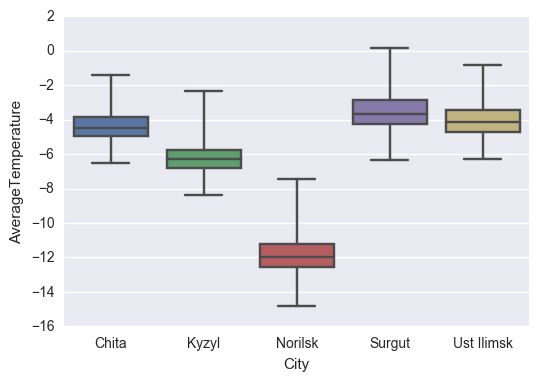

In [30]:
#Top five coldest cities in the world
coldCities = DataFrame()

for each in coldestCities['City']:
    holder = cityTemp[cityTemp['City'] == each]
    holder['Year'] = holder['dt'].apply(lambda x : x[:4])
    coldCities = coldCities.append(holder)
    
coldCitiesAvg = coldCities.groupby(['City','Year']).mean().reset_index(drop=False)

sns.boxplot(x="City", y="AverageTemperature", data=coldCitiesAvg, whis=np.inf)